<h1><center>GAN</center></h1>

# Введение

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [92]:
# Данные
path_ccf = "D:\Work_dir\Master_work\Data\Credit_Card_Fraud_Detection"

In [93]:
f'{path_ccf}\creditcard.csv'

'D:\\Work_dir\\Master_work\\Data\\Credit_Card_Fraud_Detection\\creditcard.csv'

In [94]:
data = pd.read_csv(f'{path_ccf}\creditcard.csv')

In [95]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [96]:
names = data.columns

In [37]:
X = data.iloc[:, :-1]

In [38]:
y = data.iloc[:, -1]

# Визуализация данных

Каждое изображение описывается 10 параметрами. Давайте построим распделения значений каждого параметра для каждого типа.

In [10]:
def plot_hists(X1, X2, names, label1, label2): #bins=np.linspace(-500, 500, 100)
    plt.figure(figsize=(3*4, 10*2))
    for i in range(X1.shape[1]):
        plt.subplot(10, 3, i+1)
        plt.hist(X1[:, i], bins=50, alpha=0.5, label=label1, color='C0')
        plt.hist(X2[:, i], bins=50, alpha=0.5, label=label2, color='C1')
        plt.xlabel(names[i], size=14)
        plt.legend(loc='best')
    plt.tight_layout()

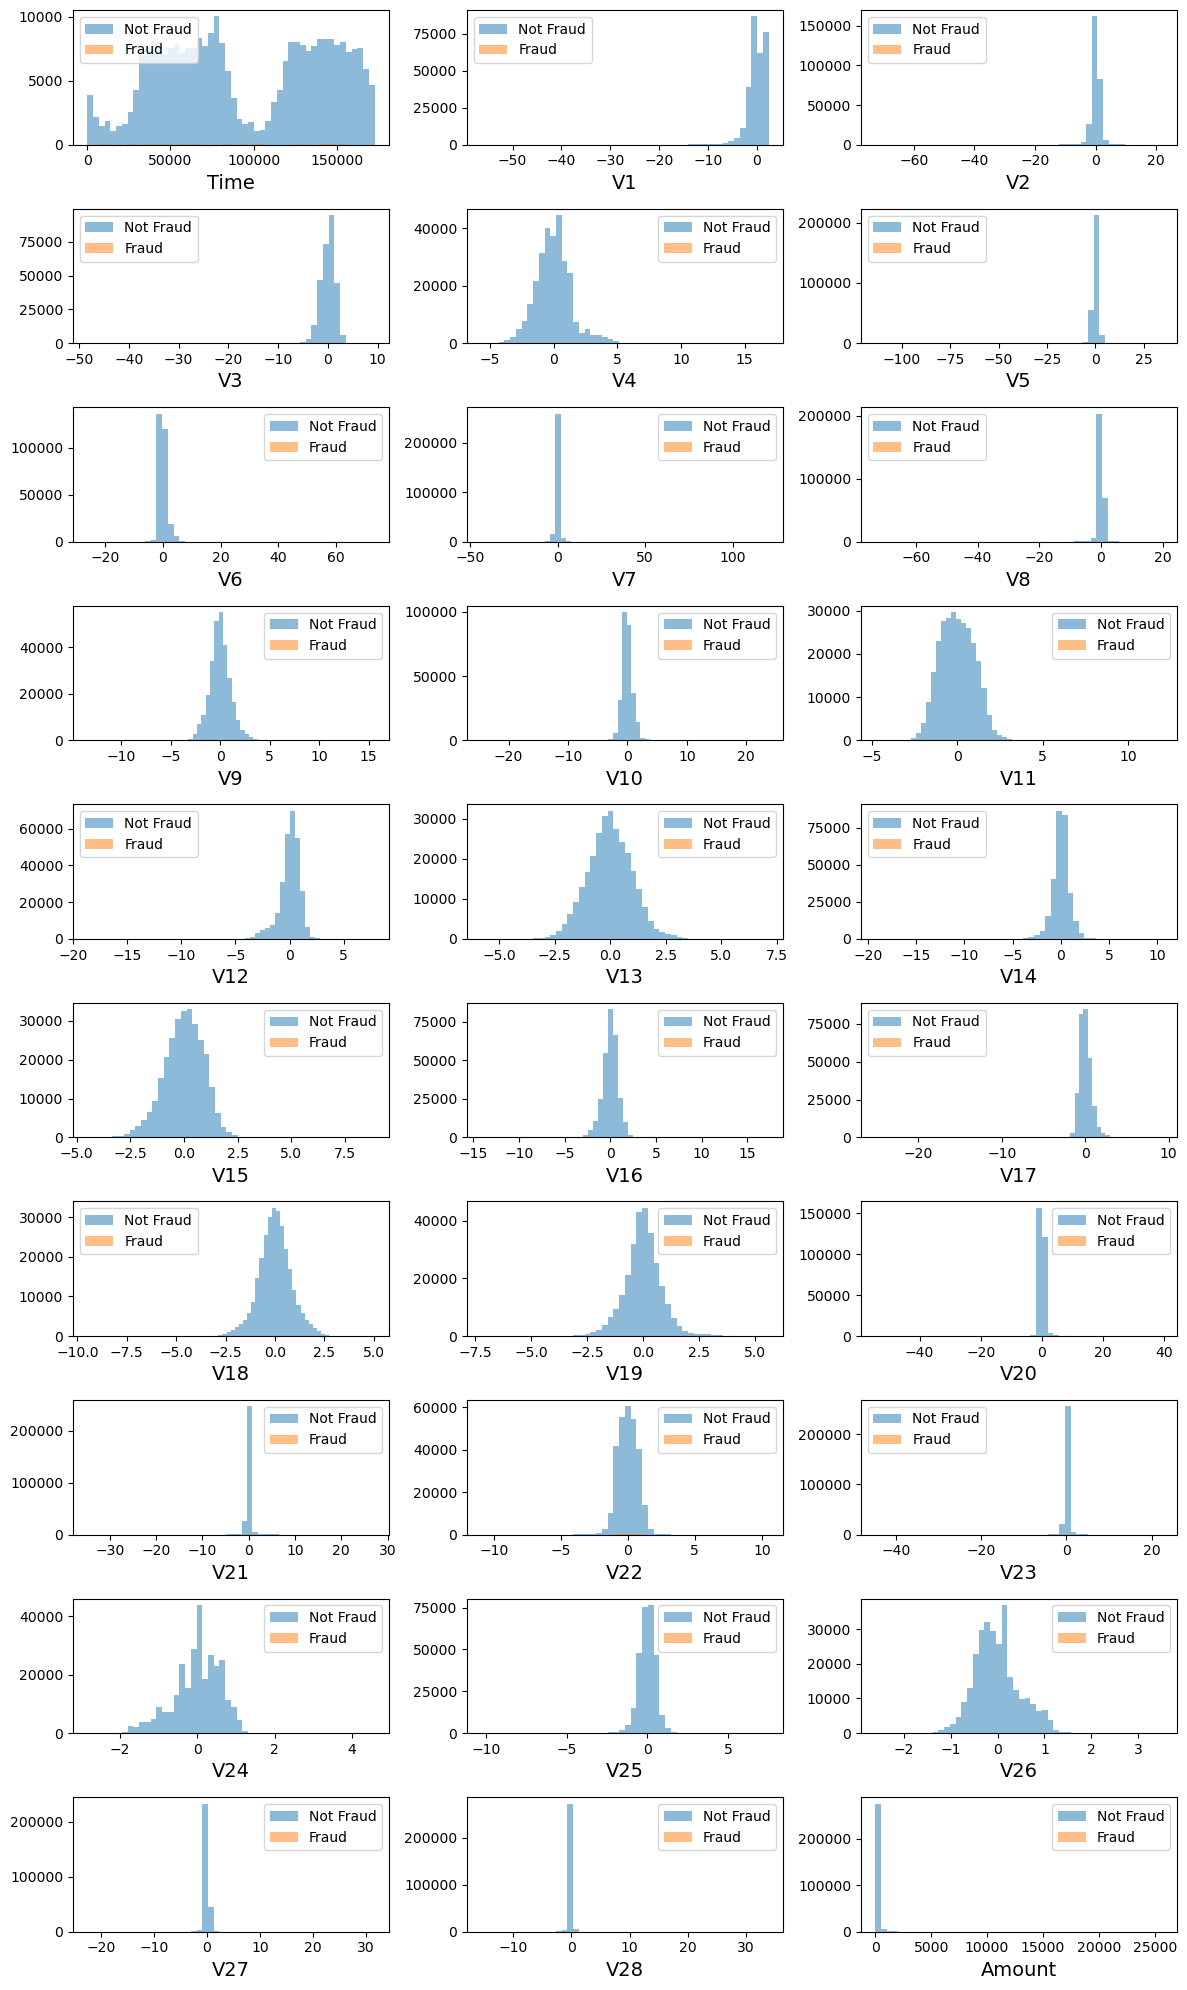

In [11]:
plot_hists(X[y==0].values, X[y==1].values, names, label1="Not Fraud", label2="Fraud")

# Приведем распределения к нормальным

In [39]:
from sklearn.preprocessing import QuantileTransformer
import pickle
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=42)
X_qt = qt.fit_transform(X.values)

In [40]:
m_ccf = "D:/Work_dir/Master_work/Experiments/4/GAN_CCF"

In [41]:
f'{m_ccf}/QT_CCF.pkl'

'D:/Work_dir/Master_work/Experiments/4/GAN_CCF/QT_CCF.pkl'

In [42]:
# Сохраним QuantileTransformer
with open(f'{m_ccf}/QT_CCF.pkl', 'wb') as fp:
    pickle.dump(qt, fp)

### Используем SMOTE для балансировки данных

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [16]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_qt, y.values)

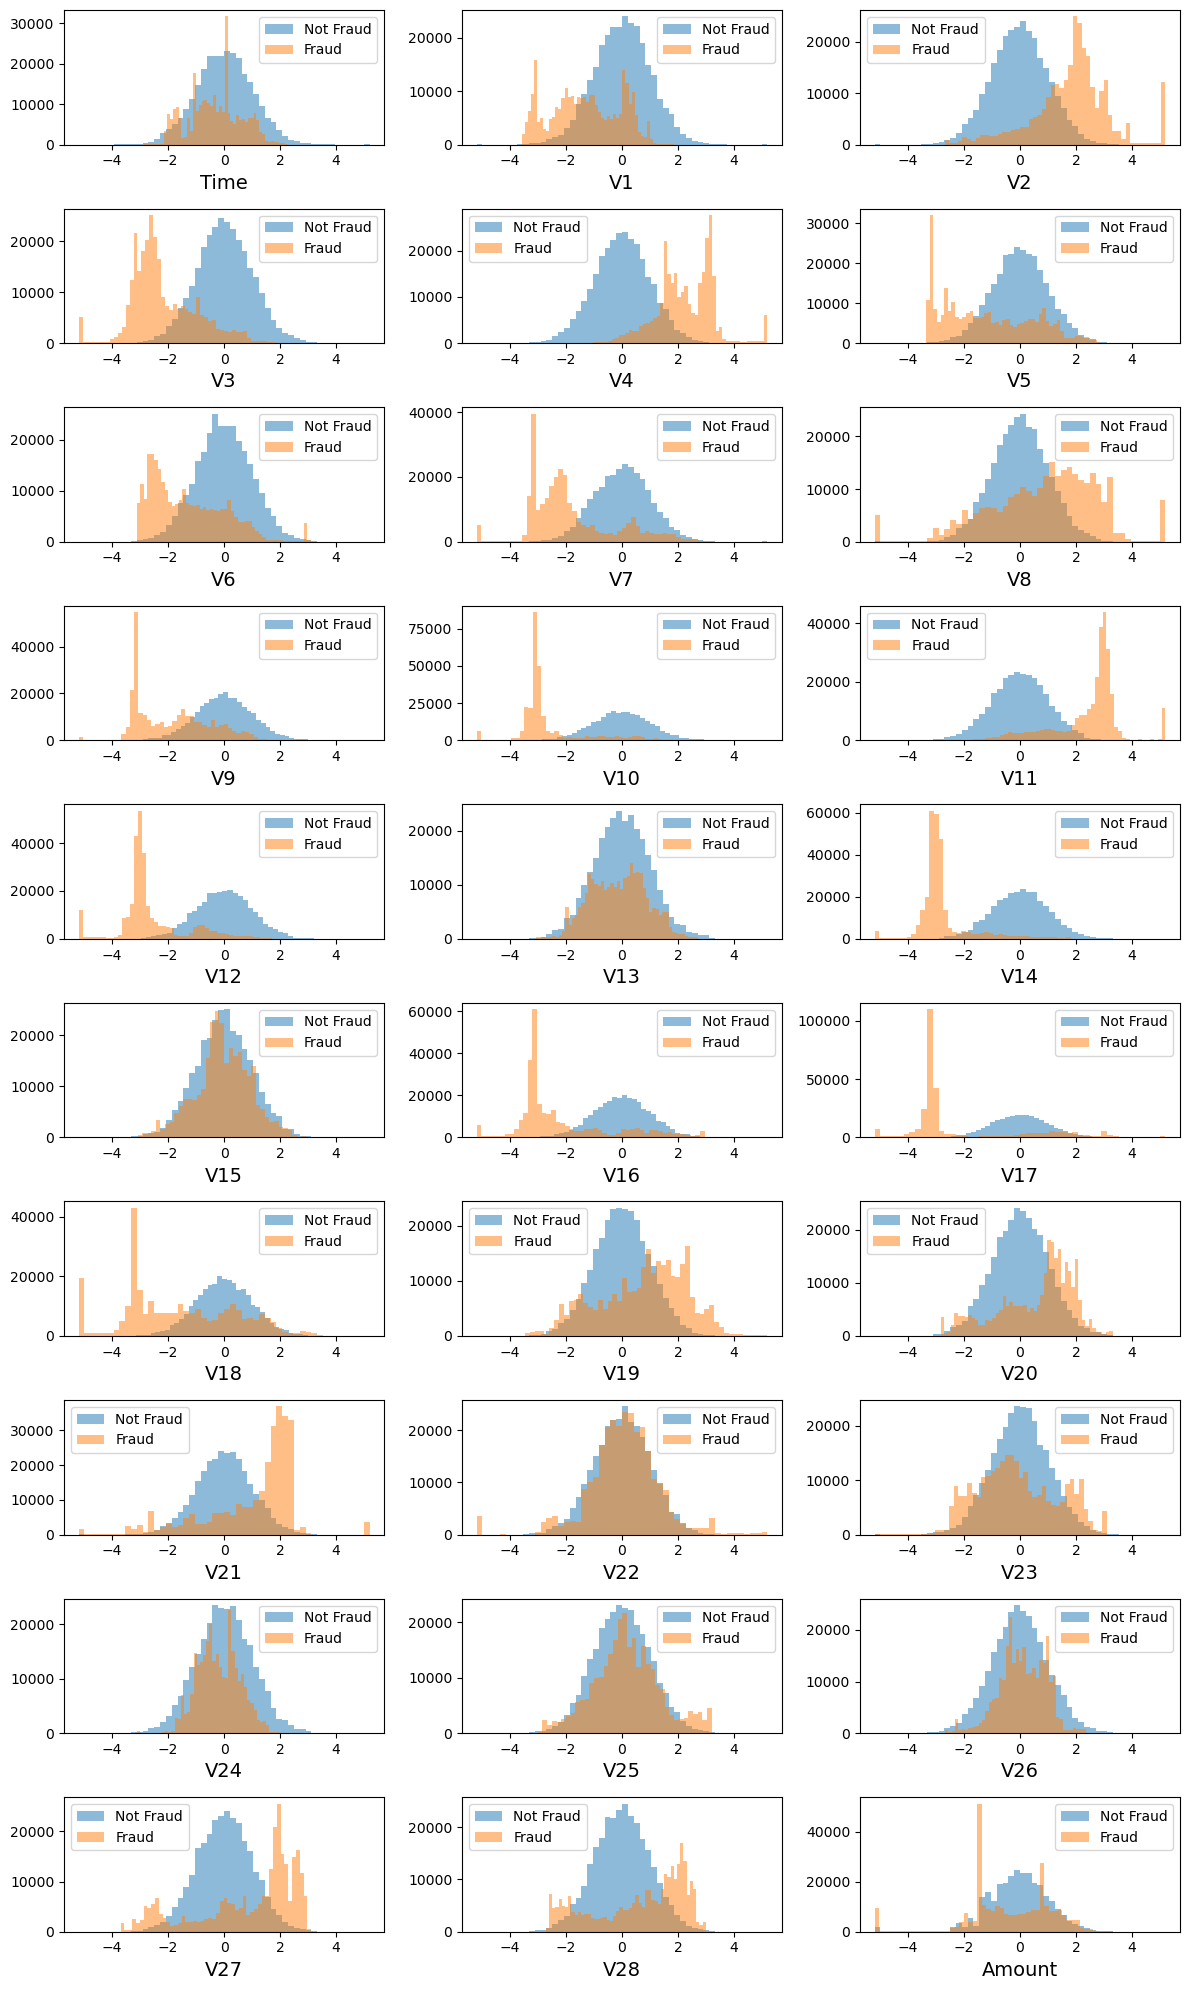

In [17]:
plot_hists(X_sm[y_sm==0], X_sm[y_sm==1], names, label1="Not Fraud", label2="Fraud")

# Обучающая и тестовая выборки

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, stratify=y_sm, test_size=0.5, shuffle=True, random_state=42)

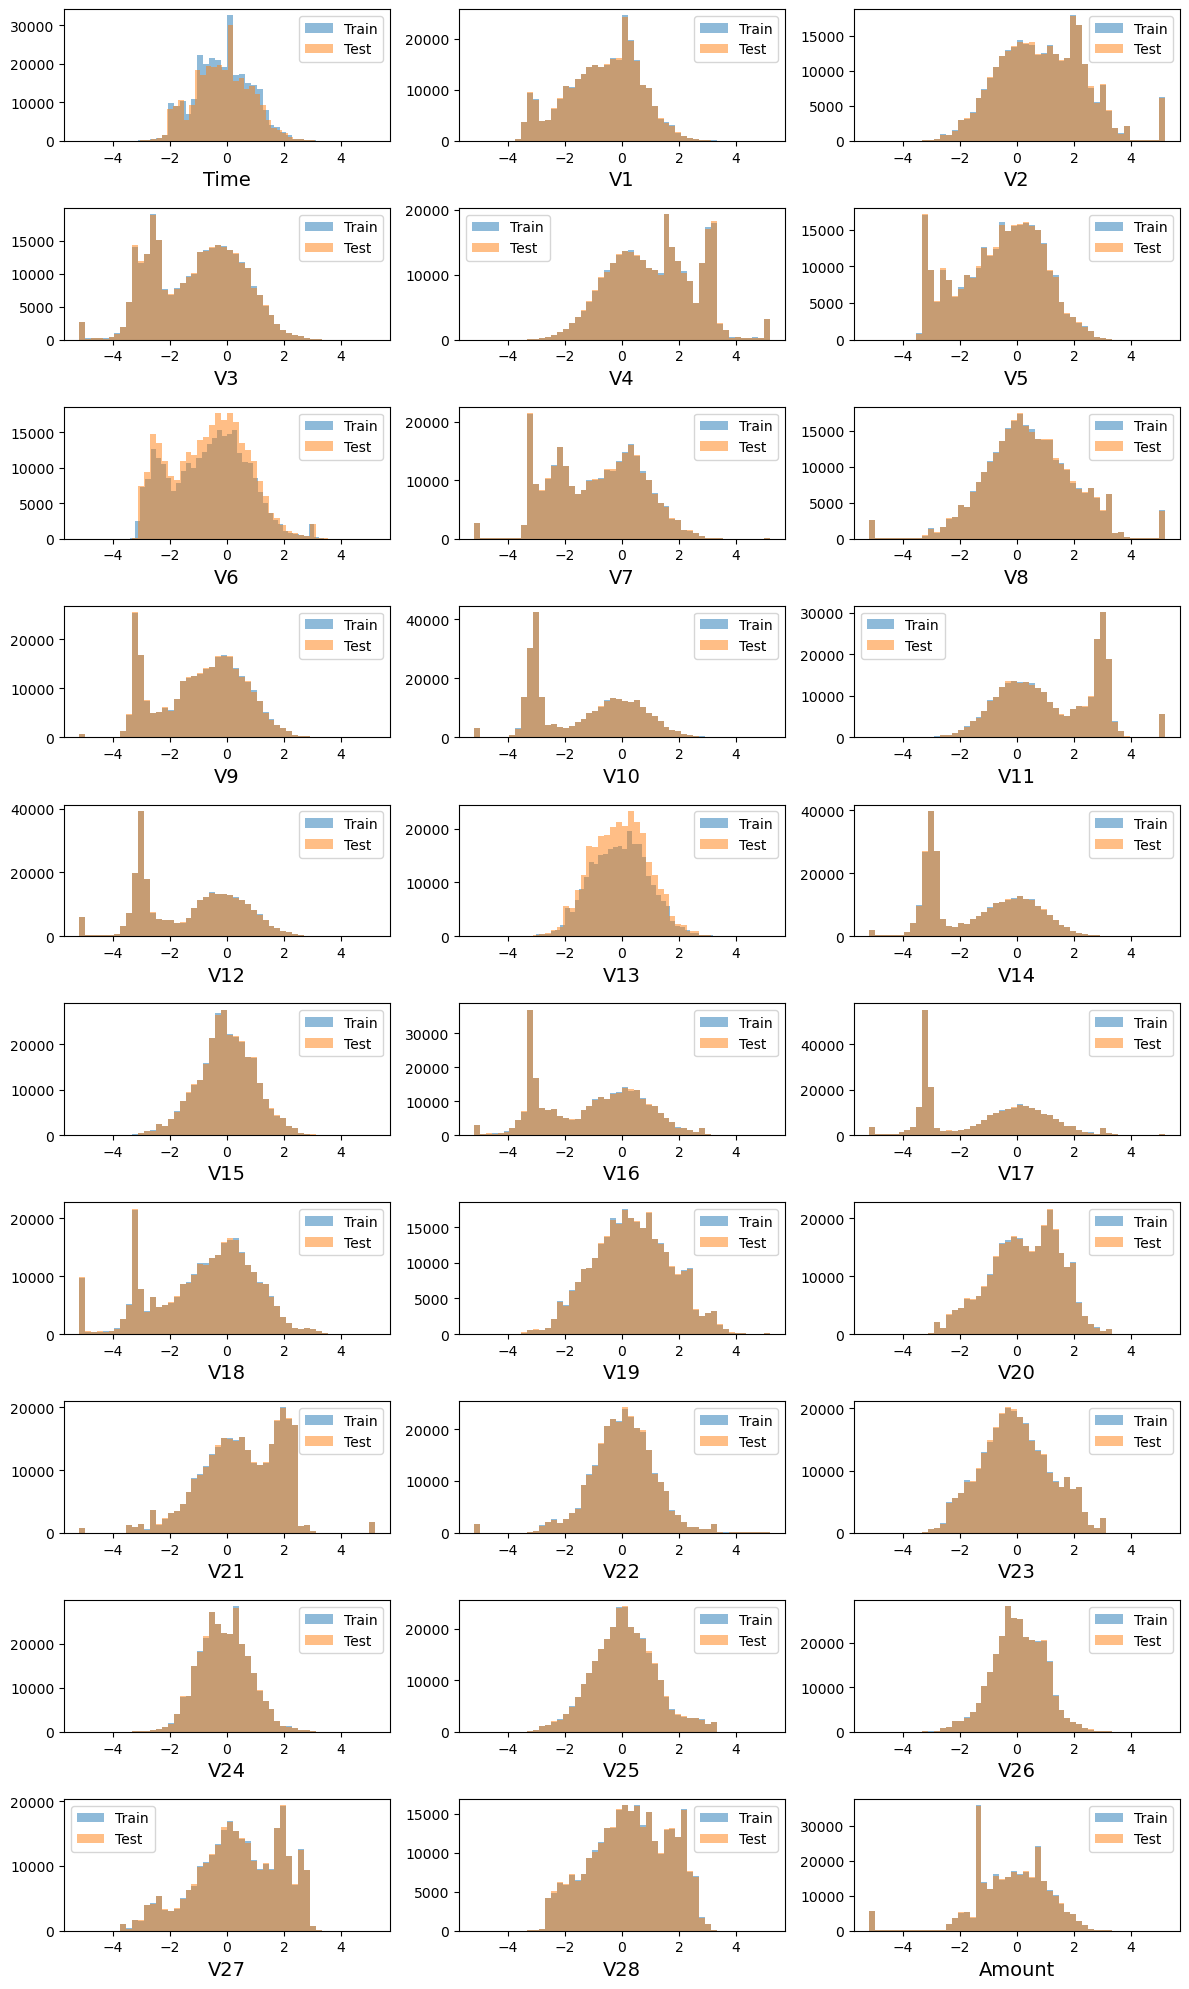

In [15]:
plot_hists(X_train, X_test, names, label1="Train", label2="Test")

# Conditional WGAN

Мы будем использовать `Conditional WGAN`, который изображен на рисунке. В качестве условия `y` мы будем использовать метку класса: **0** - not fraud, **1** - fraud. Таким образом, мы будем сообщать генератору для какой транзакции нужно генерировать параметры. 

<center><img src="img/cgan.png" width="800"></center>

Генератор $\hat{x} = G(z, y)$ будет принимать на вход шумовой вектор $z$ и вектор условий $y$, а выдавать будет сгенерированный (фейковый) вектор параметров $\hat{x}$. 

Дискриминатор $D(x, y)$ будет принимать на вход вектор параметров $x$ и вектор условий $y$, а возвращать будет рациональное число.

Обучать `Conditional WGAN` будем с такой функцией потерь:

$$L(G, D) = -\frac{1}{n} \sum_{x_i \in X, y_i \in y} D(x_i, y_i) + -\frac{1}{n} \sum_{z_i \in Z, y_i \in y} D(G(z_i, y_i), y_i) \to \max_G \min_D$$

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from typing_extensions import Literal
from IPython.display import clear_output
from tqdm import trange

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
DEVICE

device(type='cuda')

In [4]:
class Generator(nn.Module):
    
    def __init__(self, n_inputs, n_outputs):
        super(Generator, self).__init__()
            
        self.net = nn.Sequential(
            nn.Linear(n_inputs, 1000),
            nn.ReLU(),
            
            nn.Linear(1000, 500),
            nn.BatchNorm1d(500),
            nn.Dropout(0.2),
            nn.ReLU(),
            
            nn.Linear(500, n_outputs)
            )

    def forward(self, z, y):
        zy = torch.cat((z, y), dim=1)
        return self.net(zy)

In [32]:
class Discriminator(nn.Module):
    
    def __init__(self, n_inputs):
        super(Discriminator, self).__init__()
        
        self.net = nn.Sequential(
                    nn.Linear(n_inputs, 1000),
                    nn.ReLU(),
                    nn.Linear(1000, 500),
                    nn.ReLU(),
                    nn.Linear(500, 1),
                    nn.Sigmoid()
                    )

    def forward(self, x, y):
        #print(x.shape, y.shape)
        xy = torch.cat((x, y), dim=1)
        return self.net(xy)

In [33]:
class Fitter(object):
    
    def __init__(self, generator, discriminator, batch_size=32, n_epochs=10, latent_dim=1, lr=0.0001, n_critic=5):
        
        self.generator = generator
        self.discriminator = discriminator
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr
        self.n_critic = n_critic
        
        self.opt_gen  = torch.optim.RMSprop(self.generator.parameters(), lr=self.lr)
        self.opt_disc = torch.optim.RMSprop(self.discriminator.parameters(), lr=self.lr)
        
        self.generator.to(DEVICE)
        self.discriminator.to(DEVICE)
    
    def fit(self, X, y):
        
        # numpy to tensor
        X_real = torch.tensor(X, dtype=torch.float, device=DEVICE)
        y_cond = torch.tensor(y, dtype=torch.float, device=DEVICE)
        
        # tensor to dataset
        dataset_real = TensorDataset(X_real, y_cond)
        
        # Turn on training
        self.generator.train(True)
        self.discriminator.train(True)
        
        self.loss_history = []
        self.gen_loss_trace = []
        self.discr_loss_trace = []

        # Fit GAN
        for epoch in range(self.n_epochs):
            
            for i, (real_batch, cond_batch) in enumerate(DataLoader(dataset_real, batch_size=self.batch_size, shuffle=True), 0):          
                real_batch = real_batch.to(DEVICE)
                cond_batch = cond_batch.to(DEVICE)
                # зададим цикл обучения дискриминатора (генератор/дискриминатоор   1 / 5)            
                
                # генерируем новые объекты
                z = torch.normal(0, 1, (len(real_batch), self.latent_dim)).to(DEVICE)
                #print(z.shape, cond_batch.unsqueeze(1).shape)
                gen_batch = self.generator(z, cond_batch.unsqueeze(1))

                # считаем скоры
                #print(torch.cat([real_batch, gen_batch], dim=0).shape, torch.cat([cond_batch, cond_batch], dim=0).unsqueeze(1).shape)
                real_objects_scores, gen_objects_scores = torch.split(self.discriminator(
                torch.cat([real_batch, gen_batch], dim=0), 
                torch.cat([cond_batch, cond_batch], dim=0).unsqueeze(1)), len(real_batch))
                
                if i % self.n_critic == 0:
                    # делаем шаг обучения генератора
                    self.opt_gen.zero_grad()
                    
                    gen_loss = (torch.log(1 - gen_objects_scores).mean())
                    gen_loss.backward()
                    self.opt_gen.step()
                    self.gen_loss_trace.append(gen_loss.item())
                else:
                    # делаем шаг обучения дискриминатора
                    self.opt_disc.zero_grad()

                    discr_loss = -torch.log(1 - gen_objects_scores).mean() - torch.log(real_objects_scores).mean()

                    discr_loss.backward()
                    self.opt_disc.step()
                    # ограничим веса
                    for p in self.discriminator.parameters():
                        p.data.clamp_(-0.01, 0.01)
                    self.discr_loss_trace.append(discr_loss.item())
                    
                # Визуализация
                if i % 25 == 0:
                    clear_output(wait=True)
                    print(self.gen_loss_trace[-1])
                    plt.figure(figsize=(10, 5))

                    plt.subplot(1, 2, 1)
                    plt.xlabel('Iteration')
                    plt.ylabel('Generator loss')
                    plt.plot([i for i in range(1, len(self.gen_loss_trace)+1)], 
                             [p for p in self.gen_loss_trace])

                    plt.subplot(1, 2, 2)
                    plt.xlabel('Iteration')
                    plt.ylabel('Discriminator loss')
                    plt.plot([i for i in range(1, len(self.discr_loss_trace)+1)], 
                             [p for p in self.discr_loss_trace], color='orange')

                    plt.show()
                
            # caiculate and store loss after an epoch
            Z_noise = torch.normal(0, 1, (len(X_real), self.latent_dim)).to(DEVICE)
            X_fake = self.generator(Z_noise, y_cond.unsqueeze(1))
            loss_epoch = torch.mean(self.discriminator(X_real, y_cond.unsqueeze(1))) - torch.mean(self.discriminator(X_fake, y_cond.unsqueeze(1)))
            self.loss_history.append(loss_epoch.detach().cpu())
                    
        # Turn off training
        self.generator.train(False)
        self.discriminator.train(False)

## Обучение
Обучим модель на данных.

In [12]:
batch_size=8164
n_epochs=500
latent_dim=100
lr=0.0001
n_critic=5

-0.6897222399711609


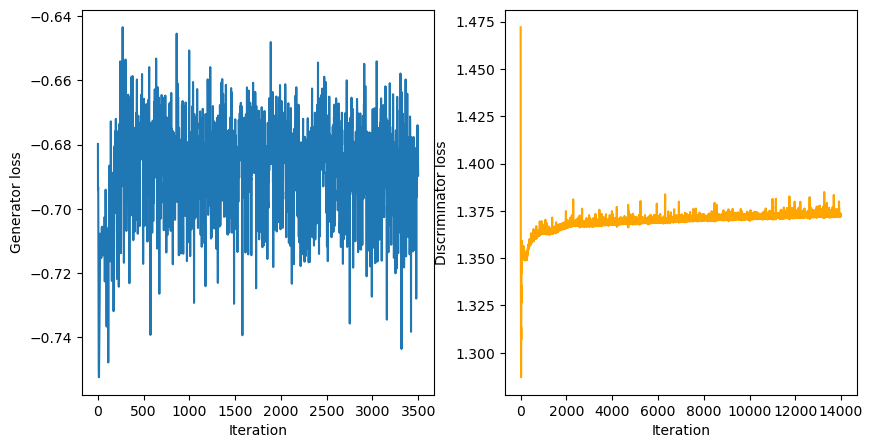

Wall time: 46min 53s


In [35]:
%%time
generator     = Generator(n_inputs=latent_dim+1, 
                          n_outputs=X_train.shape[1])
discriminator = Discriminator(n_inputs=X_train.shape[1]+1)

fitter = Fitter(generator, discriminator, batch_size=batch_size, n_epochs=n_epochs, latent_dim=latent_dim, lr=lr, n_critic=n_critic)
fitter.fit(X_train, y_train)

C:\Users\serge\AppData\Local\Temp\ipykernel_3740\3471976127.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=1, linestyle='--', linewidth=0.5, color='0.5')


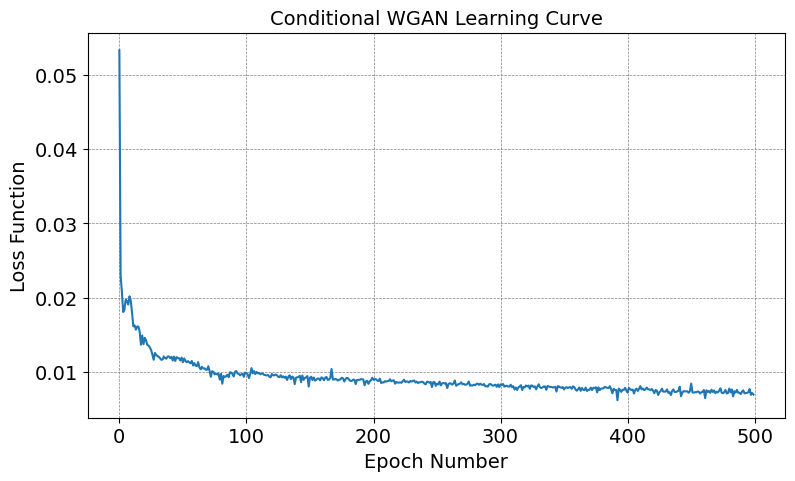

In [36]:
# WGAN learning curve
plt.figure(figsize=(9, 5))
plt.plot(fitter.loss_history)
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Conditional WGAN Learning Curve", size=14)
plt.grid(b=1, linestyle='--', linewidth=0.5, color='0.5')
plt.show()

In [16]:
m_ccf_path = "D:/Work_dir/Master_work/Experiments/4/GAN_CCF"

In [38]:
# Сохраним модель
torch.save(fitter.generator, f'{m_ccf_path}/CCF_GAN.pt')

In [11]:
# Загрузим модель
model = torch.load(f'{m_ccf_path}/CCF_GAN.pt')
model.eval()

Generator(
  (net): Sequential(
    (0): Linear(in_features=101, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=500, bias=True)
    (3): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=500, out_features=30, bias=True)
  )
)

In [12]:
torch.save(model.state_dict(), f'{m_ccf_path}/CCF_GAN.pth')

Теперь сгенерируем фейковые матрицы `X_fake_train` и `X_fake_test`. Сравним их с матрицами реальных объектов `X_train` и `X_test`

In [41]:
X_fake_train = generate(fitter.generator, y_train, latent_dim)

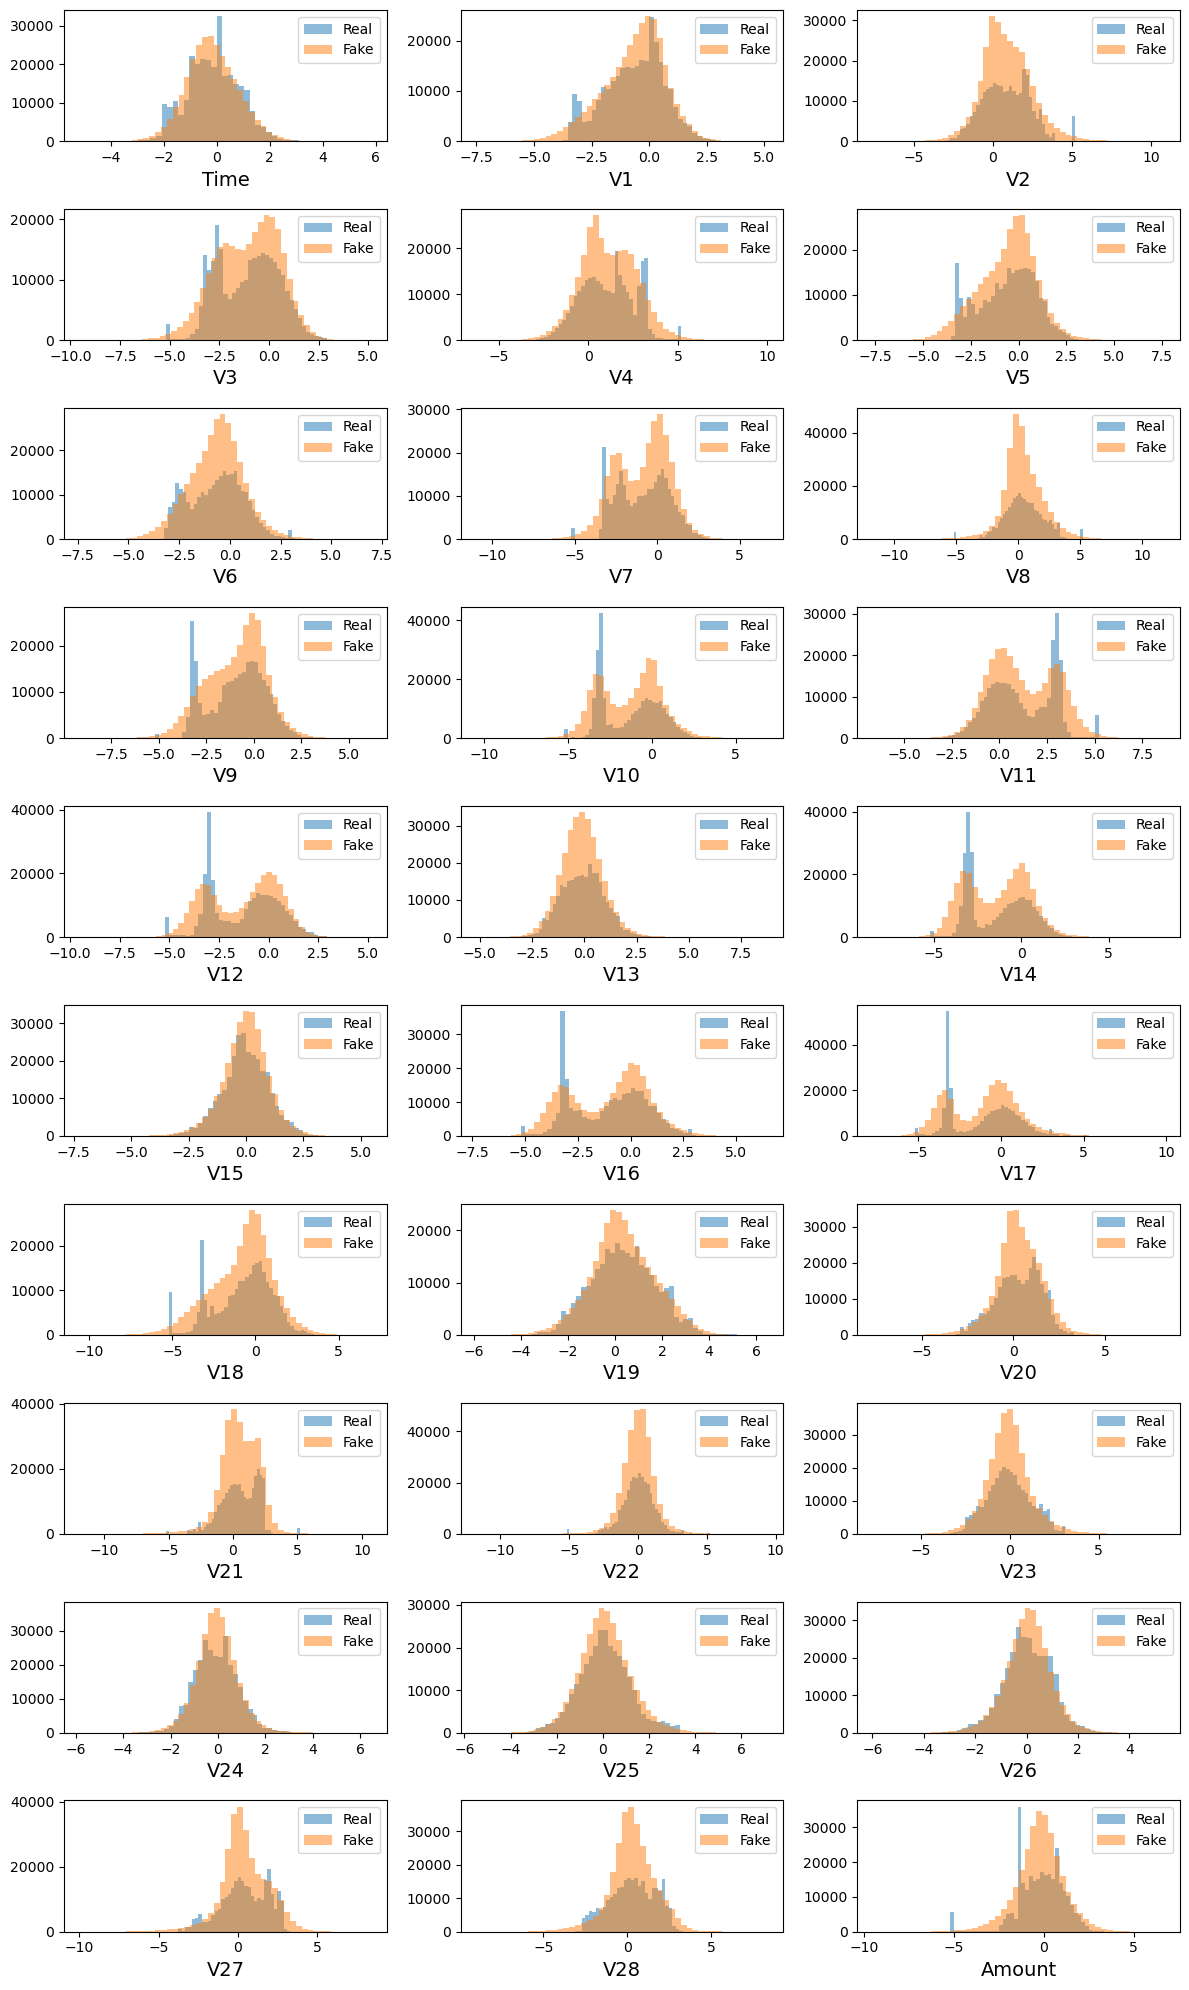

In [42]:
plot_hists(X_train, X_fake_train, names, label1="Real", label2="Fake")

In [43]:
X_fake_test = generate(fitter.generator, y_test, latent_dim)

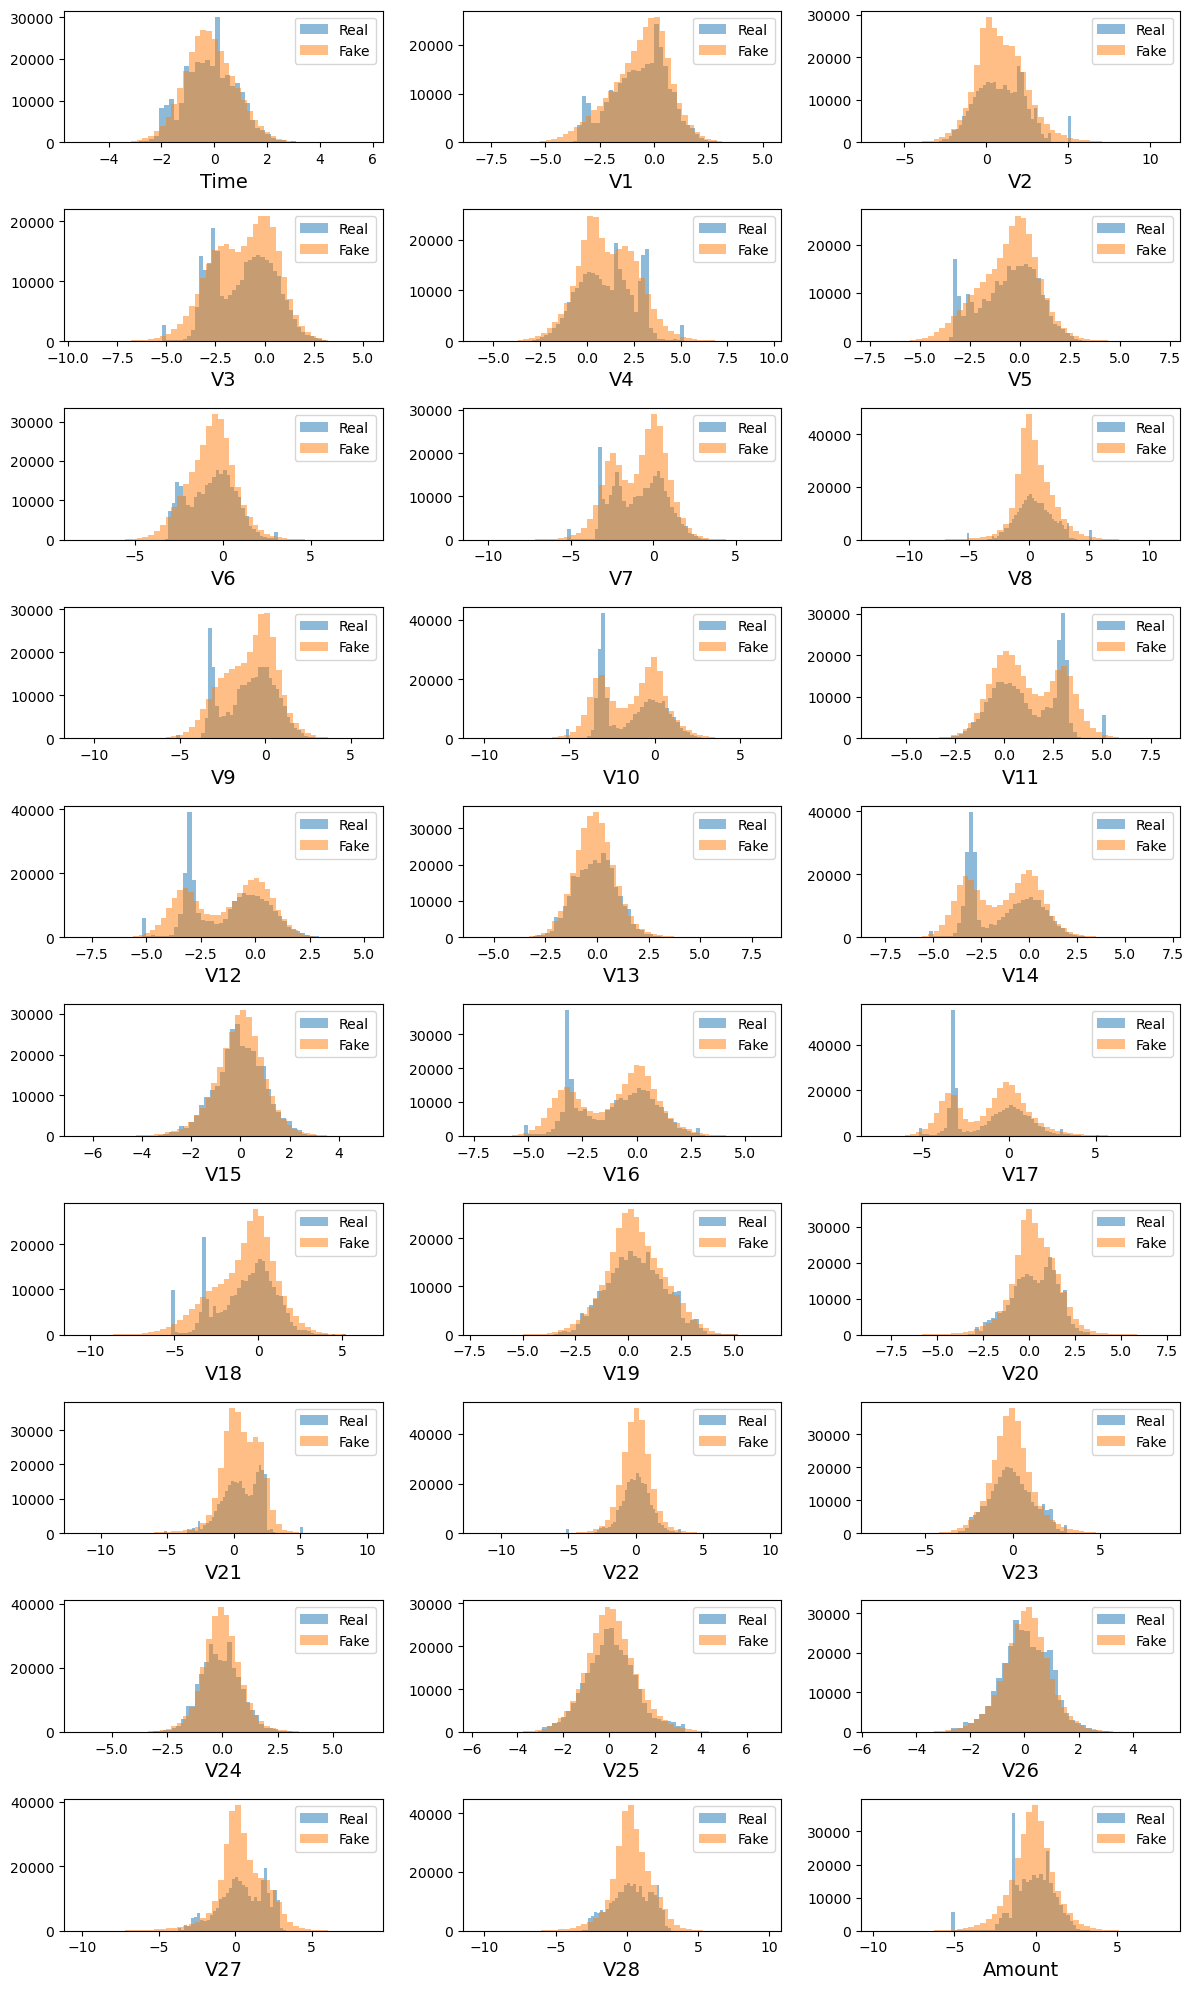

In [44]:
plot_hists(X_test, X_fake_test, names, label1="Real", label2="Fake")

# Измерение качества генерации

<center><img src="img/clf.png" width="600"></center>

Измерим сходство распределений классификатором.

In [50]:
# собираем реальный и фейковые матрицы в одну
XX_train = np.concatenate((X_fake_train, X_train), axis=0)
XX_test = np.concatenate((X_fake_test, X_test), axis=0)

yy_train = np.array([0]*len(X_fake_train) + [1]*len(X_train))
yy_test = np.array([0]*len(X_fake_test) + [1]*len(X_test))

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [52]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.906226414892029


## Вывод

Идеальное значение ROC AUC равно 0.5. Это соответствует случаю, когда классификатор не может разделить реальные и фейковые данные. В нашем случае ROC AUC около 0.92, что говорит о том, что генератор не работает.

In [46]:
X_gen_qt_norm = generate(fitter.generator, y, latent_dim)

In [47]:
X_qt_inverse = qt.inverse_transform(X_qt)

C:\Users\serge\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [48]:
X_gen_qt = qt.inverse_transform(X_gen_qt_norm)

C:\Users\serge\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


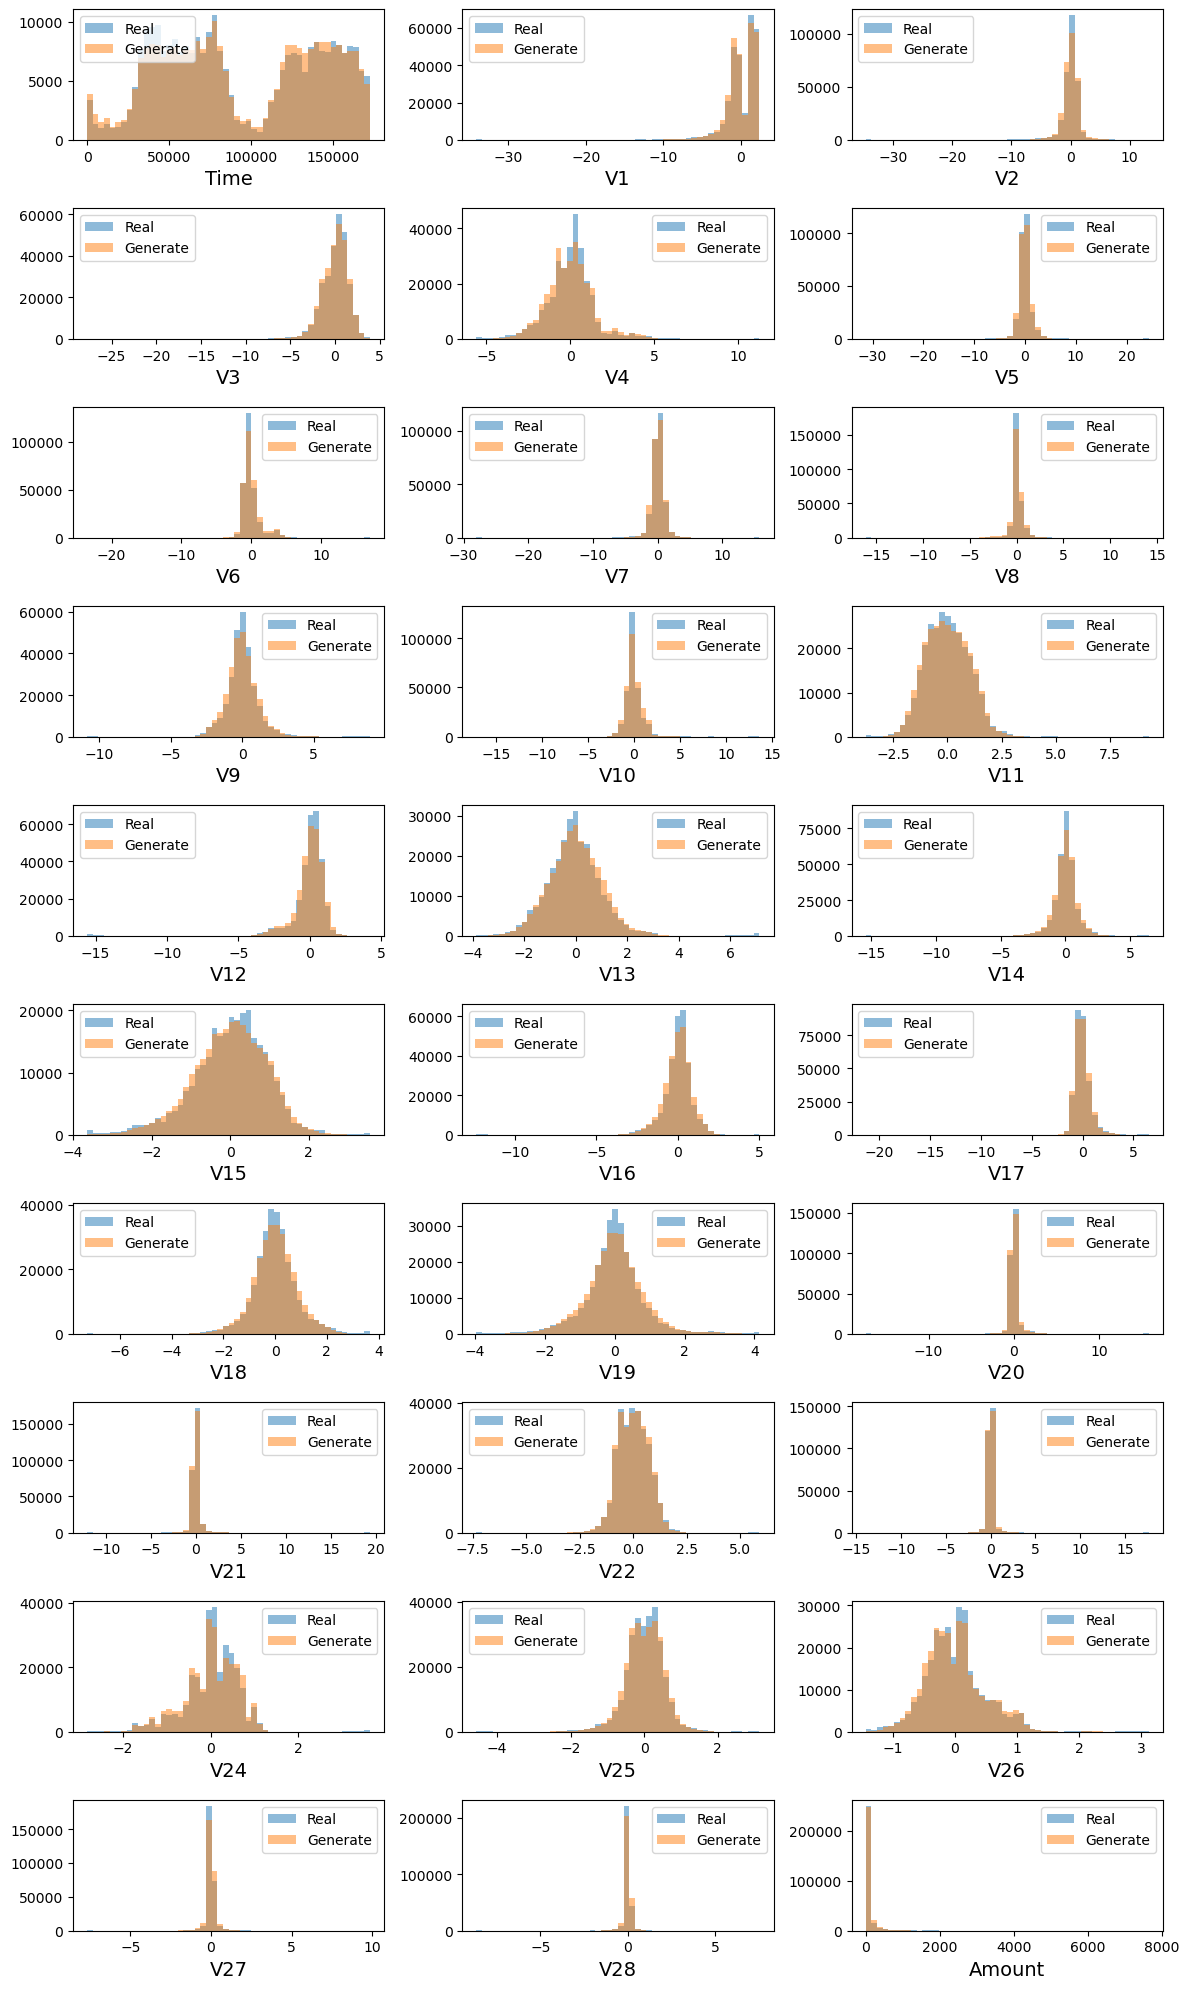

In [49]:
plot_hists(X_gen_qt, X_qt_inverse, names, label1="Real", label2="Generate")

# Сгенерируем исходный вариант данных

In [24]:
def generate(generator, y, latent_dim, batch_size):
    
    with torch.no_grad():
        Z_noise = torch.normal(0, 1, (len(y), latent_dim)).to(DEVICE)
        y_cond = torch.tensor(y, dtype=torch.float, device=DEVICE)
        
        # tensor to dataset
        dataset_real = TensorDataset(Z_noise, y_cond)
        
        res = np.zeros(shape=[batch_size, Z_noise.shape[1]])
        first = True
        for i, (real_batch, cond_batch) in enumerate(DataLoader(dataset_real, batch_size=batch_size, shuffle=False), 0):          
            Z_batch = real_batch.to(DEVICE)
            y_batch = cond_batch.to(DEVICE)
        
            gen_batch = generator(Z_batch, y_batch.unsqueeze(1)).detach().cpu().numpy()
            #print(gen_batch.shape)
            if first:
                res = gen_batch
                first = False
            else:
                res = np.vstack((res, gen_batch))
            torch.cuda.empty_cache()

    return res

In [25]:
batch_size=8164
latent_dim=100

In [28]:
X_fake = generate(model, y, latent_dim, batch_size)

In [30]:
X_inverse = qt.inverse_transform(X_fake)

C:\Users\serge\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [32]:
X_inverse.shape

(284807, 30)

In [33]:
X.shape

(284807, 30)

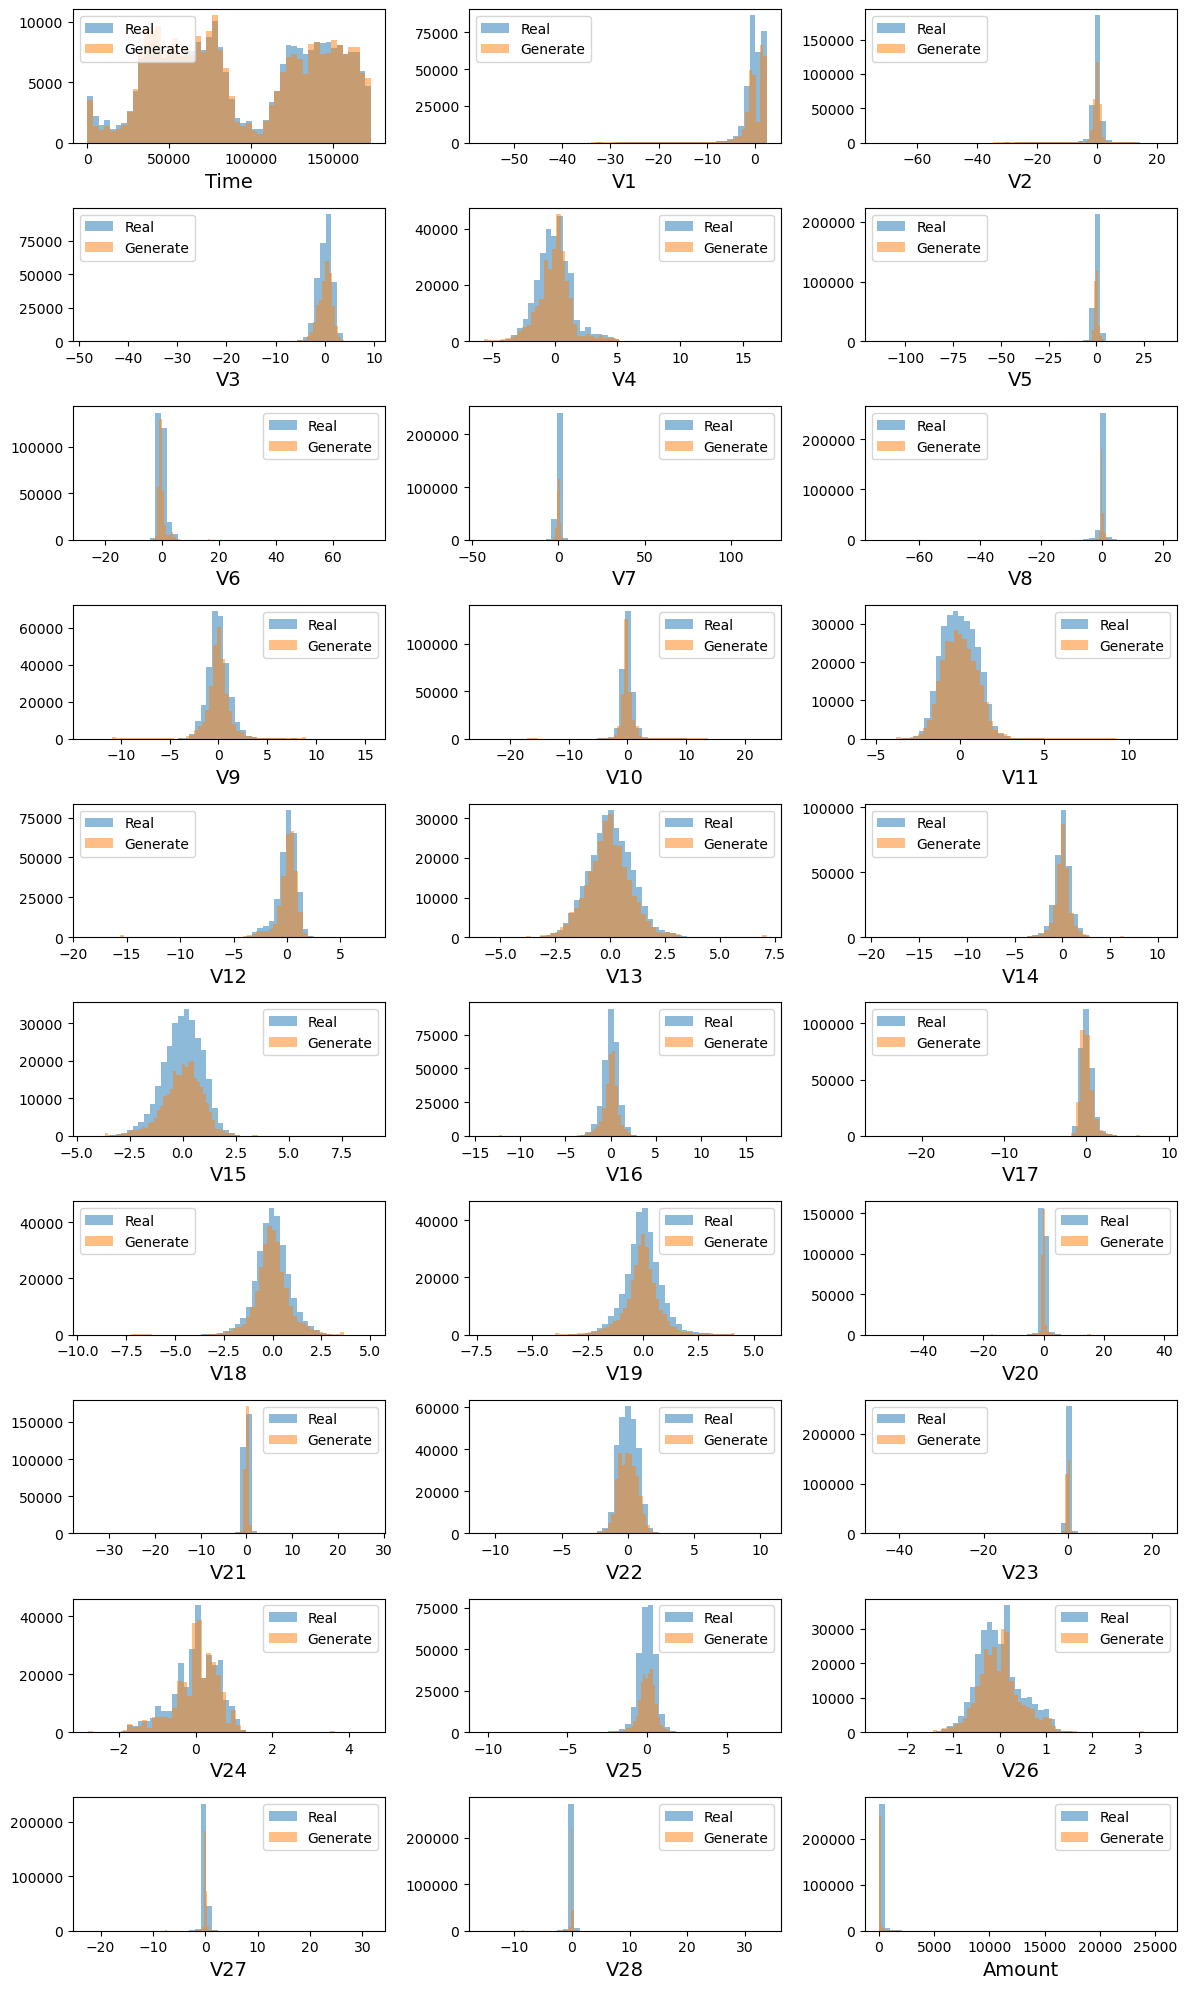

In [34]:
plot_hists(X.values, X_inverse, names, label1="Real", label2="Generate")

In [5]:
def generate(generator, y, latent_dim):

    Z_noise = torch.normal(0, 1, (len(y), latent_dim)).to(DEVICE)
    y = torch.tensor(y, dtype=torch.float, device=DEVICE)
    X_fake = generator(Z_noise, y.unsqueeze(1)).cpu().detach().numpy()

    return X_fake # numpy

In [6]:
generator = Generator(n_inputs=100+1, n_outputs=30)

In [7]:
m_ccf_path = "D:/Work_dir/Master_work/Experiments/4/GAN_CCF"

In [8]:
generator.load_state_dict(torch.load(f'{m_ccf_path}/CCF_GAN.pth'))
generator.eval()

Generator(
  (net): Sequential(
    (0): Linear(in_features=101, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=500, bias=True)
    (3): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=500, out_features=30, bias=True)
  )
)

In [9]:
generator.to(DEVICE)

Generator(
  (net): Sequential(
    (0): Linear(in_features=101, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=500, bias=True)
    (3): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=500, out_features=30, bias=True)
  )
)

In [54]:
f = 22*1000
n = 100000-f

In [55]:
y_1 = np.random.randint(low=0, high=1, size=n)
y_2 = np.random.randint(low=1, high=2, size=f)
y = np.concatenate([y_1, y_2])

In [56]:
np.random.shuffle(y)

In [57]:
y.sum()

22000

In [58]:
X_gan = generate(generator, y, 100)

In [59]:
from sklearn.preprocessing import QuantileTransformer
import pickle
import seaborn as sns
import prettytable as pt

In [60]:
m_ccf = "D:/Work_dir/Master_work/Experiments/4/GAN_CCF"

In [61]:
with open(f'{m_ccf}/QT_CCF.pkl', 'rb') as fp:
    qt = pickle.load(fp)

In [62]:
X_inverse = qt.inverse_transform(X_gan)

In [63]:
X_inverse

array([[ 6.2589258e+04,  4.9040723e-03, -8.7047184e-01, ...,
        -8.4373258e-02,  1.1981070e-01,  4.0970673e+02],
       [ 3.7686219e+04, -1.1589198e+00, -1.0601296e-01, ...,
         2.1933578e-01,  4.9576336e-01,  9.4468231e+00],
       [ 6.6774656e+04, -3.4077240e+01,  1.8476273e+00, ...,
        -5.2953456e-02, -8.6565695e+00,  4.9201689e+00],
       ...,
       [ 1.4227912e+05,  1.1052117e+00,  3.0388021e-01, ...,
         4.3328390e-03, -6.2708385e-02,  2.9981665e+01],
       [ 1.4464175e+04,  6.9927537e-01, -1.4684557e+00, ...,
         8.1367716e-02,  3.3044487e-02,  1.1199545e+01],
       [ 8.5698570e+04, -1.5866026e+00,  2.3476356e-01, ...,
        -3.5484452e-02, -3.3072117e-01,  7.6958356e+02]], dtype=float32)

In [64]:
def pred_array(pred):
    """Функция predict lgbm"""
    res = []
    for i in pred:
        if i >= 0.8:
            res.append(1)
        else:
            res.append(0)
    return np.array(res)

In [65]:
from base import metrics

In [107]:
with open('LGBM.pickle', 'rb') as f:
    m = pickle.load(f)

lgbm = m.predict(X_inverse)
lgbm_test_model_pred = pred_array(lgbm)

In [108]:
lgbm_test_model_pred.sum()

15665

In [109]:
y.sum()

22000

In [110]:
lgbm_test_model_pred

array([0, 0, 1, ..., 0, 0, 0])

In [111]:
y

array([0, 0, 1, ..., 1, 0, 0])

In [112]:
recall_nf, recall_f, auc, f1, mcc, g_mean = metrics.write_metrics(y, lgbm_test_model_pred)
tmp = {'Recall_not_fraud': round(recall_nf, 4),
       'Recall_fraud____': round(recall_f, 4),
       'AUC___________': round(auc, 4),
       'F1_____________': round(f1, 4),
       'MCC___________': round(mcc, 4),
       'G_mean________': round(g_mean, 4)}
tmp

{'Recall_not_fraud': 0.9999,
 'Recall_fraud____': 0.7116,
 'AUC___________': 0.8557,
 'F1_____________': 0.8313,
 'MCC___________': 0.8109,
 'G_mean________': 0.8435}

# Опробуем модель Custom

In [72]:
class Our_Model_2(nn.Module):
    def __init__(self, input_size, output_size):
        super(Our_Model_2, self).__init__()

        # Энкодер
        self.ae = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512, momentum=0.1),
            nn.ReLU(),

            nn.Linear(512, 64),
            nn.BatchNorm1d(64, momentum=0.1),
            nn.ReLU(),

            nn.Linear(64, 16),
            nn.BatchNorm1d(16, momentum=0.1),
            nn.ReLU(),

            nn.Linear(16, 64),
            nn.BatchNorm1d(64, momentum=0.1),
            nn.ReLU(),

            nn.Linear(64, 512),
            nn.BatchNorm1d(512, momentum=0.6),
            nn.ReLU(),

            nn.Linear(512, input_size)
        )

        # Добавим нормализацию к исходным данным
        self.norm = nn.Sequential(
            nn.Linear(input_size, input_size),
            nn.BatchNorm1d(input_size, momentum=0.1)
        )

        # Определим голову для обучения классификатора
        self.classifier_head = nn.Sequential(
            nn.Linear(input_size * 2, 16),
            nn.BatchNorm1d(16, momentum=0.8),
            nn.ReLU(),

            nn.Linear(16, output_size),
        )

        self.sigm = nn.Sigmoid()

    def forward(self, x):
        ae = self.ae(x)
        # Получаем разность Выхода и входа Автоэнкодера
        x_d = ae - x
        # Исходные данные
        x_norm = self.norm(x)

        # Конкатенируем полученную Разность и исходные данные
        x_hidden = torch.cat((x_norm, x_d), dim=1)
        # Обучаем классификатор
        clf_head = self.classifier_head(x_hidden)
        return clf_head.view(-1)

    def predict(self, x):
        y_logit = self.forward(x)
        y_probs = self.sigm(y_logit)

        return y_probs

In [79]:
from sklearn. metrics import matthews_corrcoef

In [95]:
def ccf_get_prediction(model, d_loader):
    threshold = 0.48
    for batch in d_loader:
        x_batch = batch[0].to(DEVICE)
        clf = model.predict(x_batch).detach().cpu().numpy()

    clf[clf > threshold] = 1
    clf[clf <= threshold] = 0

    return clf

In [103]:
def find_tresh(model, d_loader):
    threshold = 0.5
    for batch in d_loader:
        x_batch = batch[0].to(DEVICE)
        y = batch[1].detach().cpu().numpy().astype('int')
        clf = model.predict(x_batch).detach().cpu().numpy()
    
    tmp = clf.copy()
    clf[clf > threshold] = 1
    clf[clf <= 0.5] = 0
    metric = matthews_corrcoef(y, clf)
    b_t = threshold
    
    for i in range(10, 91):
        tm = tmp.copy()
        t = float(f'0.{i}')
        tm[tm > t] = 1
        tm[tm <= t] = 0
        m = matthews_corrcoef(y, tm)
        if  m > metric:
            b_t = t
        #print(f'0.{i}', m)
    
    
    return b_t

In [104]:
find_tresh(custom_model, gan_loader)

0.49

In [96]:
# Загрузим модель
sample_size = 30
output_size = 1
custom_model = Our_Model_2(sample_size, output_size).to(DEVICE)
custom_model.load_state_dict(torch.load('Custom.pth'))
custom_model.eval()

Our_Model_2(
  (ae): Sequential(
    (0): Linear(in_features=30, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=16, bias=True)
    (7): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=16, out_features=64, bias=True)
    (10): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=512, bias=True)
    (13): BatchNorm1d(512, eps=1e-05, momentum=0.6, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=512, out_features=30, bias=True)
  )
  (norm): Sequential(
    (0): Linear(in_features=30, out_features

In [97]:
dataset = TensorDataset(
          torch.tensor(X_inverse.astype(np.float32)),
          torch.tensor(y.astype(np.float32)))

In [98]:
gan_loader = DataLoader(dataset, batch_size=X_inverse.shape[0], shuffle=False)

In [99]:
test_model_pred = ccf_get_prediction(custom_model, gan_loader)

In [100]:
test_model_pred.sum()

5096.0

In [145]:
def plot_report(X, y, predict):
    a = X[:, -1]
    b = y.astype(int)
    c = predict.astype(int)
    nm = {'Amount': a, 'Class': b, 'Predict': c}
    data = pd.DataFrame(nm)
    TP = data[(data['Class'] == 1) & ((data['Predict'] == 1))]
    TN = data[(data['Class'] == 0) & ((data['Predict'] == 0))]
    FP = data[(data['Class'] == 0) & ((data['Predict'] == 1))]
    FN = data[(data['Class'] == 1) & ((data['Predict'] == 0))]

    data.loc[TP.index, ['Label']] = 'Заблокированные \nмошенники'#'TP'
    data.loc[TN.index, ['Label']] = 'Одобренные \nнормальные'#'TN'
    data.loc[FP.index, ['Label']] = 'Заблокированные \nнормальные'#'FP'
    data.loc[FN.index, ['Label']] = 'Одобренные \nмошенники'#'FN'

    g = sns.catplot(data=data, x="Label", kind="count", height=5, aspect=1.4,
                    order=['Одобренные \nнормальные', 'Одобренные \nмошенники', 'Заблокированные \nнормальные', 'Заблокированные \nмошенники'],
                    hue_order=['blue', 'red', 'orange', 'green'],
                    palette=sns.color_palette(['#247EC3', '#FF4B2F', '#FFAC2F',  '#1C8920']))
    g.set_axis_labels("Действия с транзакциями", "Количество транзакций")
    #g.set_xticklabels(["Одобренные \nнормальные", "Заблокированные \nмошенники",
    #                   "Пропущенные \nмошенники", "Заблокированные \nнормальные"]);

    #g.savefig(f"plot.png")

    keys = {'Одобренные нормальные_____': TN['Amount'].sum(),
            'Одобренные мошенники_____': FN['Amount'].sum(),
            'Заблокированные мошенники_': TP['Amount'].sum(),
            'Заблокированные нормальные': FP['Amount'].sum()}

    table = pt.PrettyTable(['Действие с транзакциями', 'Денежная сумма'])
    table.align['Действие с транзакциями'] = 'l'
    table.align['Денежная сумма'] = 'r'
    for key, val in keys.items():
        table.add_row([key, f'{val:.1f}'])

    return table

Действие с транзакциями,Денежная сумма
Одобренные нормальные_____,10050071.0
Одобренные мошенники_____,2694901.8
Заблокированные мошенники_,982149.5
Заблокированные нормальные,466624.8


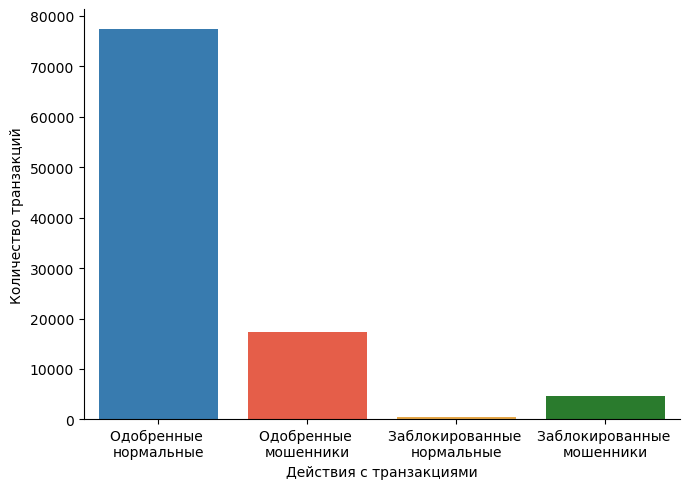

In [146]:
plot_report(X_inverse, y, test_model_pred)

Действие с транзакциями,Денежная сумма
Одобренные нормальные_____,10516638.0
Одобренные мошенники_____,1333349.2
Заблокированные мошенники_,2343701.8
Заблокированные нормальные,57.2


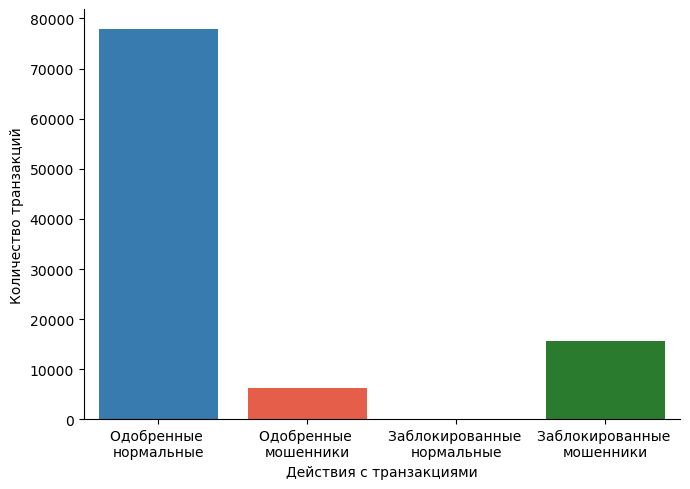

In [147]:
plot_report(X_inverse, y, lgbm_test_model_pred)